In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv("C:/Users/JRC/Desktop/survey_results_public.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [12]:
df_year = df[['YearsCode','YearsCodePro','CompTotal']]

In [13]:
df['YearsCode'].unique() 

array([nan, '14', '20', '8', '15', '3', '1', '6', '37', '5', '12', '22',
       '11', '4', '7', '13', '36', '2', '25', '10', '40', '16', '27',
       '24', '19', '9', '17', '18', '26', 'More than 50 years', '29',
       '30', '32', 'Less than 1 year', '48', '45', '38', '39', '28', '23',
       '43', '21', '41', '35', '50', '33', '31', '34', '46', '44', '42',
       '47', '49'], dtype=object)

In [15]:
df_year['YearsCodePro'].unique()

array([nan, '5', '17', '3', '6', '30', '2', '10', '15', '4', '22', '20',
       '40', '9', '14', '21', '7', '18', '25', '8', '12', '45', '1', '19',
       '28', '24', '11', '23', 'Less than 1 year', '32', '27', '16', '44',
       '26', '37', '46', '13', '31', '39', '34', '38', '35', '29', '42',
       '36', '33', '43', '41', '48', '50', 'More than 50 years', '47',
       '49'], dtype=object)

In [16]:
df_year.loc[df_year.YearsCode == 'Less than 1 year','YearsCode'] = '0'

In [17]:
df_year.loc[df_year.YearsCode == 'More than 50 years','YearsCode'] = '50'

In [18]:
df_year.loc[df_year.YearsCodePro == 'Less than 1 year','YearsCode'] = '0'

In [19]:
df_year.loc[df_year.YearsCodePro == 'More than 50 years','YearsCode'] = '50'

In [20]:
df_year['CompTotal']

0             NaN
1             NaN
2         32000.0
3         60000.0
4             NaN
           ...   
73263     60000.0
73264    107000.0
73265         NaN
73266     58500.0
73267         NaN
Name: CompTotal, Length: 73268, dtype: float64

In [21]:
df_year.YearsCode = pd.to_numeric(df_year.YearsCode,errors='coerce')

C:\Users\JRC\AppData\Local\Temp\ipykernel_28608\3775038618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year.YearsCode = pd.to_numeric(df_year.YearsCode,errors='coerce')


In [22]:
df_year.YearsCodePro = pd.to_numeric(df_year.YearsCodePro,errors='coerce')

C:\Users\JRC\AppData\Local\Temp\ipykernel_28608\1117459950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year.YearsCodePro = pd.to_numeric(df_year.YearsCodePro,errors='coerce')


In [24]:
type(df_year.YearsCode[20])

numpy.float64

In [26]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearsCode     71333 non-null  float64
 1   YearsCodePro  49820 non-null  float64
 2   CompTotal     38422 non-null  float64
dtypes: float64(3)
memory usage: 1.7 MB


In [27]:
df_year.describe()

,YearsCode,YearsCodePro,CompTotal
count,71333.000000,49820.000000,3.842200e+04
mean,12.123996,10.268727,2.342434e+52
std,10.048432,8.576772,4.591478e+54
min,0.000000,1.000000,0.000000e+00
25%,5.000000,4.000000,3.000000e+04
50%,9.000000,8.000000,7.750000e+04
75%,16.000000,15.000000,1.540000e+05
max,50.000000,50.000000,9.000000e+56


In [72]:
df['OpSysProfessional use'].value_counts()

Windows                                                                                    16645
macOS                                                                                      12541
Linux-based                                                                                10934
Linux-based;Windows                                                                         5637
Linux-based;macOS                                                                           4906
Windows;Windows Subsystem for Linux (WSL)                                                   3800
Linux-based;Windows;Windows Subsystem for Linux (WSL)                                       3003
macOS;Windows                                                                               2327
Linux-based;macOS;Windows                                                                   1551
Linux-based;macOS;Windows;Windows Subsystem for Linux (WSL)                                  897
Linux-based;Windows Subsystem 

In [73]:
df.loc[df['OpSysProfessional use']=='Windows;Windows Subsystem for Linux (WSL)','OpSysProfessional use']= 'Windows'

In [77]:
df.loc[df['OpSysProfessional use']=='Linux-based;Windows;Windows Subsystem for Linux (WSL)',
       'OpSysProfessional use']= 'Linux-based;Windows'

In [78]:
df.where(~(df['OpSysProfessional use'].str.contains('BSD|:|WSL', na=False)), np.nan, inplace=True)

In [79]:
df['OpSysProfessional use'].value_counts()

Windows                      20445
macOS                        12541
Linux-based                  10934
Linux-based;Windows           8640
Linux-based;macOS             4906
macOS;Windows                 2327
Linux-based;macOS;Windows     1551
Name: OpSysProfessional use, dtype: int64

Text(0.5, 1.0, 'OpSysProfessional use')

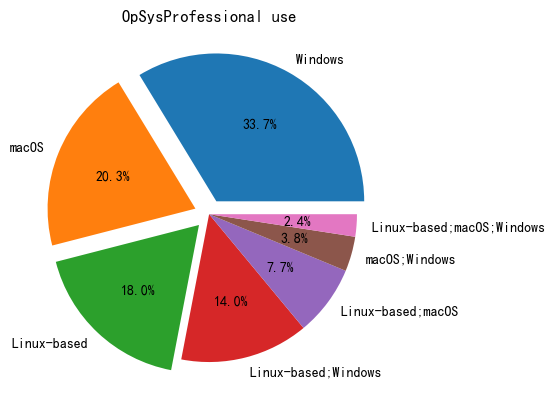

In [91]:
plt.pie(df['OpSysProfessional use'].value_counts()[0:7],
        labels=["Windows","macOS","Linux-based","Linux-based;Windows","Linux-based;macOS","macOS;Windows","Linux-based;macOS;Windows"],
        explode=[0.1,0.1,0.1,0,0,0,0],
        autopct='%.1f%%')
plt.title("OpSysProfessional use")

In [92]:
oscount= df['OpSysProfessional use'].value_counts()

Text(0.5, 1.0, 'OpSysProfessional use')

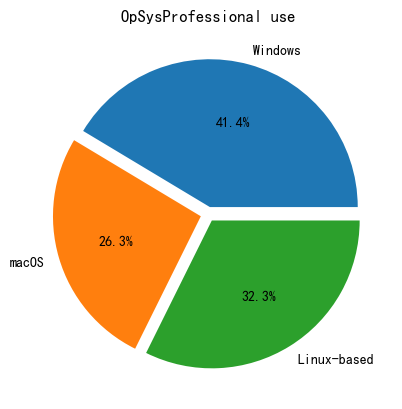

In [94]:
plt.pie([oscount[0]+oscount[3]+oscount[5]+oscount[6],
         oscount[1]+oscount[4]+oscount[5]+oscount[6],
         oscount[2]+oscount[3]+oscount[4]+oscount[6]],
        labels=["Windows","macOS","Linux-based"],
        explode=[0.05,0.05,0.05],
        autopct='%.1f%%')
plt.title("OpSysProfessional use")

Text(0.5, 1.0, 'OpSysPersonal use')

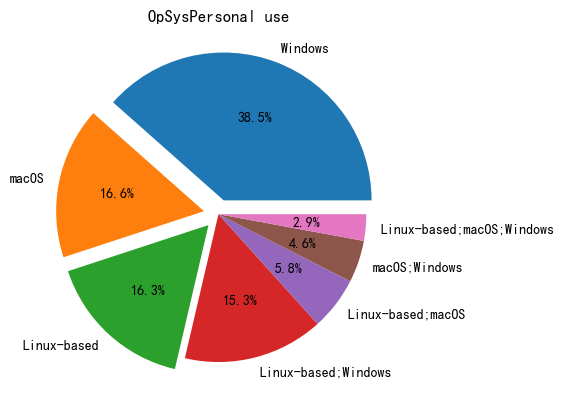

In [90]:
df.loc[df['OpSysPersonal use']=='Windows;Windows Subsystem for Linux (WSL)','OpSysPersonal use']= 'Windows'
df.loc[df['OpSysPersonal use']=='Linux-based;Windows;Windows Subsystem for Linux (WSL)',
       'OpSysPersonal use']= 'Linux-based;Windows'
df.where(~(df['OpSysPersonal use'].str.contains('BSD|:|WSL', na=False)), np.nan, inplace=True)
plt.pie(df['OpSysPersonal use'].value_counts()[0:7],
        labels=["Windows","macOS","Linux-based","Linux-based;Windows","Linux-based;macOS","macOS;Windows","Linux-based;macOS;Windows"],
        explode=[0.1,0.1,0.1,0,0,0,0],
        autopct='%.1f%%')
plt.title("OpSysPersonal use")

Text(0.5, 1.0, 'OpSysPersonal use')

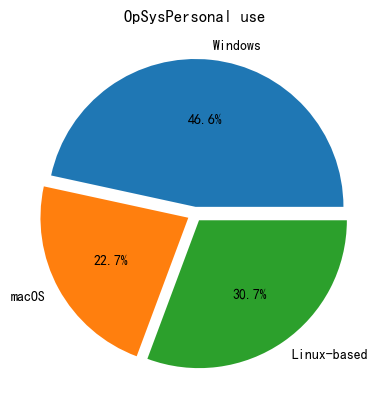

In [97]:
oscount= df['OpSysPersonal use'].value_counts()
plt.pie([oscount[0]+oscount[3]+oscount[5]+oscount[6],
         oscount[1]+oscount[4]+oscount[5]+oscount[6],
         oscount[2]+oscount[3]+oscount[4]+oscount[6]],
        labels=["Windows","macOS","Linux-based"],
        explode=[0.05,0.05,0.05],
        autopct='%.1f%%')
plt.title("OpSysPersonal use")